1. Imports
2. Dataset Generation
3. Loading & Inspecting Data
4. Train–Test Split
5. Feature Scaling (Why & How)
6. Visualizing Raw Data
7. Regression Line Intuition
8. ε-Insensitive Tube
9. Support Vectors (Visually)
10. Effect of ε
11. Effect of C
12. Conclusion

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('svm_regression_data.csv')
df.head()

,X,y
0,3.745401,13.748855
1,9.507143,35.739508
2,7.319939,28.205933
3,5.986585,21.524344
4,1.560186,11.192201


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       200 non-null    float64
 1   y       200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [5]:
df.describe()

,X,y
count,200.000000,200.000000
mean,4.840062,19.075047
std,2.948914,10.456237
min,0.055221,0.367902
25%,2.285824,9.833001
50%,4.944863,18.151652
75%,7.568596,28.217525
max,9.868869,39.053096


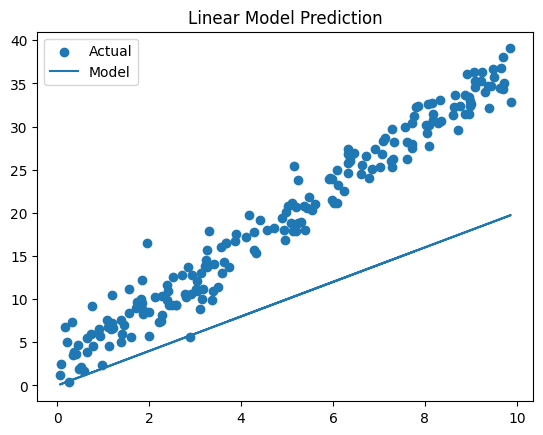

In [7]:
"""
Line Eqn: y^i=w*xi+b

"""
x=df['X']
t=df['y']
w=2.0
b=0.0

y_hat= w*x+b

plt.scatter(x, t, label="Actual")
plt.plot(x, y_hat, label="Model")
plt.legend()
plt.title("Linear Model Prediction")
plt.show()

In [8]:
epsilon = 1.5
errors = np.abs(t - y_hat)

epsilon_loss = np.maximum(0, errors - epsilon)

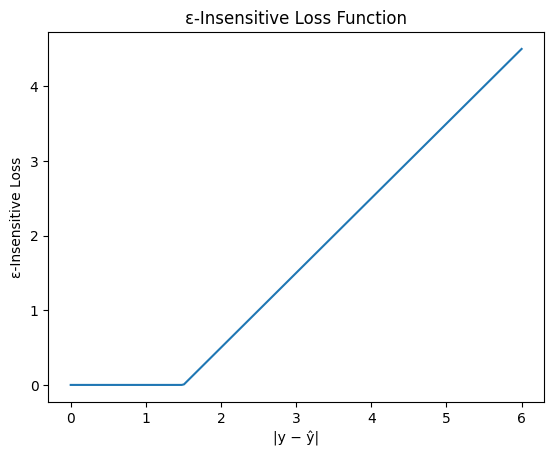

In [9]:
err_range = np.linspace(0, 6, 200)
loss_curve = np.maximum(0, err_range - epsilon)

plt.plot(err_range, loss_curve)
plt.xlabel("|y − ŷ|")
plt.ylabel("ε-Insensitive Loss")
plt.title("ε-Insensitive Loss Function")
plt.show()

In [10]:
C = 1.0

regularization = 0.5 * w**2
loss_term = C * np.sum(epsilon_loss)

objective = regularization + loss_term

regularization, loss_term, objective

(2.0, np.float64(1585.60151582534), np.float64(1587.60151582534))

In [11]:
support_mask = errors > epsilon

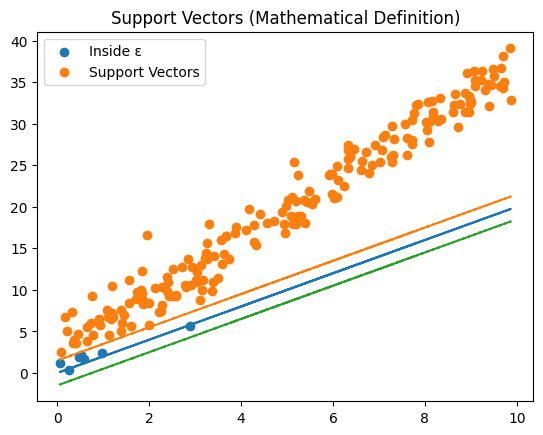

In [12]:
plt.scatter(x[~support_mask], t[~support_mask], label="Inside ε")
plt.scatter(x[support_mask], t[support_mask], label="Support Vectors")

plt.plot(x, y_hat)
plt.plot(x, y_hat + epsilon, linestyle="--")
plt.plot(x, y_hat - epsilon, linestyle="--")

plt.legend()
plt.title("Support Vectors (Mathematical Definition)")
plt.show()

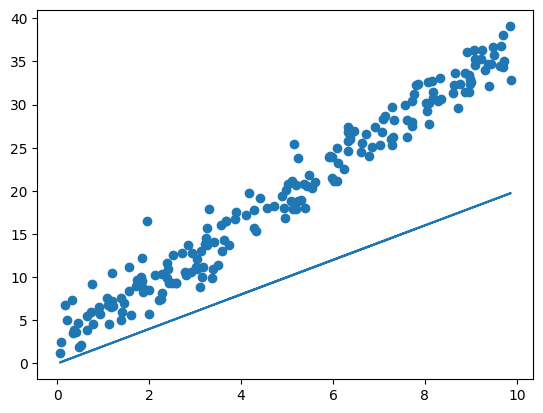

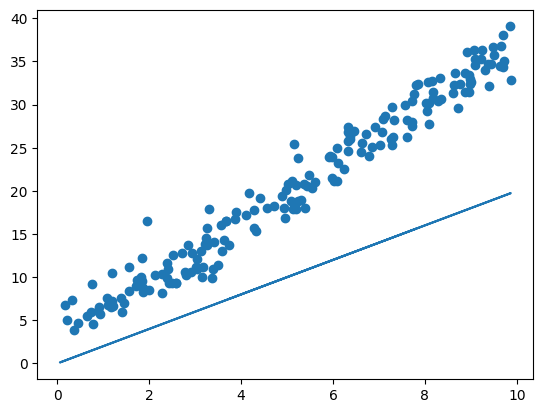

In [13]:
for epsilon in [0.5, 3.0]:
    errors = np.abs(t - y_hat)
    support_mask = errors > epsilon
    
    plt.scatter(x[support_mask], t[support_mask], label=f"ε = {epsilon}")
    plt.plot(x, y_hat)
    plt.show()

In [14]:
for C in [0.1, 10]:
    objective = 0.5 * w**2 + C * np.sum(epsilon_loss)
    print(f"C={C}, Objective={objective}")

C=0.1, Objective=160.560151582534
C=10, Objective=15858.015158253398


In [15]:
"""ArithmeticErrorYou did everything except the solver.

You:

defined 
𝑓
(
𝑥
)
=
𝑤
𝑥
+
𝑏
f(x)=wx+b

defined ε-insensitive loss

computed empirical risk

identified support vectors mathematically

visualized margins and sparsity

evaluated the objective numerically

❌ You did not:

optimize 
𝑤
,
𝑏
w,b

solve the constrained QP

compute dual variables 
𝛼α
i


So formally, what this is:

A hand-constructed ε-SVR objective demonstration

or more cleanly:

An unoptimized ε-SVR formulation"""

'ArithmeticErrorYou did everything except the solver.\n\nYou:\n\ndefined \n𝑓\n(\n𝑥\n)\n=\n𝑤\n𝑥\n+\n𝑏\nf(x)=wx+b\n\ndefined ε-insensitive loss\n\ncomputed empirical risk\n\nidentified support vectors mathematically\n\nvisualized margins and sparsity\n\nevaluated the objective numerically\n\n❌ You did not:\n\noptimize \n𝑤\n,\n𝑏\nw,b\n\nsolve the constrained QP\n\ncompute dual variables \n𝛼α\ni\n\n\nSo formally, what this is:\n\nA hand-constructed ε-SVR objective demonstration\n\nor more cleanly:\n\nAn unoptimized ε-SVR formulation'

In [ ]:
"""Purpose (write this as Markdown above the cell)

This section fits an actual Support Vector Regression (SVR) model using scikit-learn to validate the mathematical intuition developed earlier. The implementation is shown for completeness;
 the focus of this notebook remains on the theoretical formulation."""

'Purpose (write this as Markdown above the cell)\n\nThis section fits an actual Support Vector Regression (SVR) model\n using scikit-learn to validate the mathematical intuition developed earlier.\n The implementation is shown for completeness;\n the focus of this notebook remains on the theoretical formulation.'

In [ ]:
w = 0.0
b = 0.0

C = 1.0
epsilon = 1.5
lr = 0.01
epochs = 200
loss_history = []

for epoch in range(epochs):
    dw = w          # derivative of 0.5 * w^2
    db = 0.0
    total_loss = 0.0
    
    for xi, yi in zip(X_train_scaled, y_train):
        y_pred = w * xi + b
        error = yi - y_pred
        abs_error = abs(error)
        
        if abs_error > epsilon:
            loss = abs_error - epsilon
            total_loss += loss
            
            if error > 0:
                dw -= C * xi
                db -= C
            else:
                dw += C * xi
                db += C
    
    # parameter update
    w -= lr * dw
    b -= lr * db
    
    # total objective
    objective = 0.5 * w**2 + C * total_loss
    loss_history.append(objective)
    plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Objective Value")
plt.title("Manual ε-SVR Training Convergence")
plt.show()
y_final = w * X_train_scaled + b

plt.scatter(X_train_scaled, y_train, label="Training Data")
plt.plot(X_train_scaled, y_final, label="Learned SVR Line")

plt.plot(X_train_scaled, y_final + epsilon, linestyle="--")
plt.plot(X_train_scaled, y_final - epsilon, linestyle="--")

plt.legend()
plt.title("Manually Trained ε-SVR Model")
plt.show()